<a href="https://colab.research.google.com/github/d-gurgurov/neural_nets/blob/main/TextCl_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [40]:
# exploratory data analysis
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


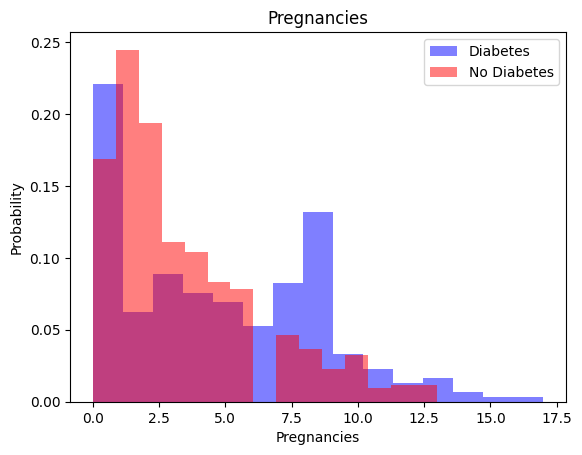

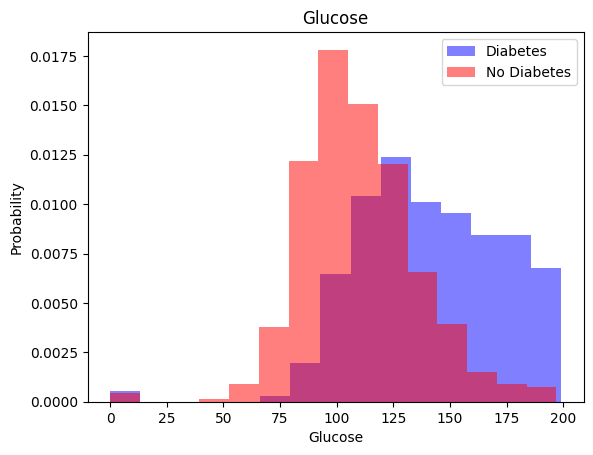

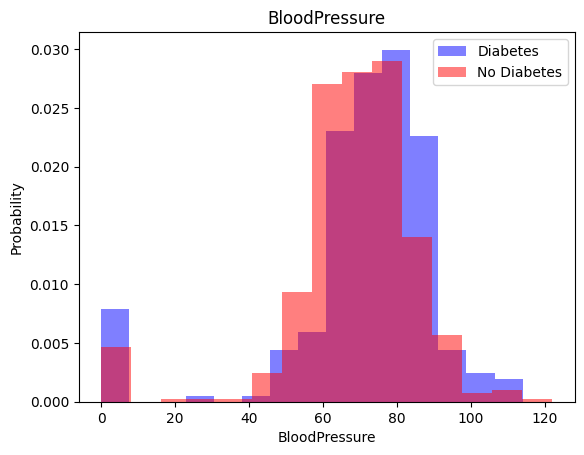

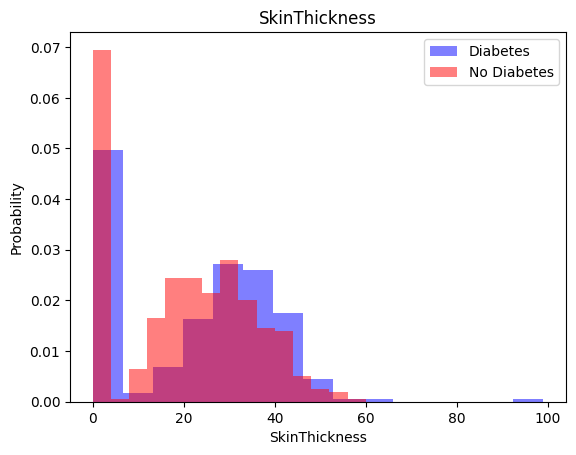

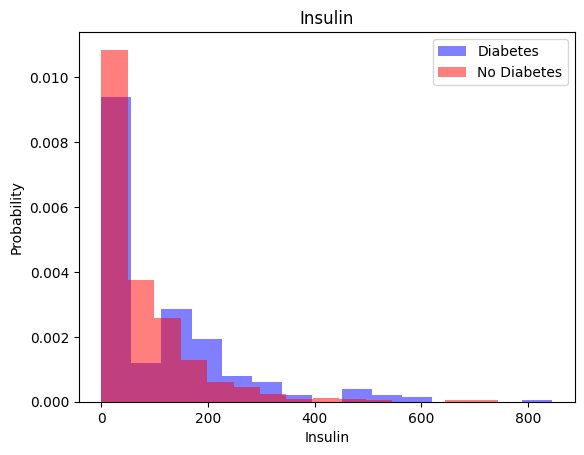

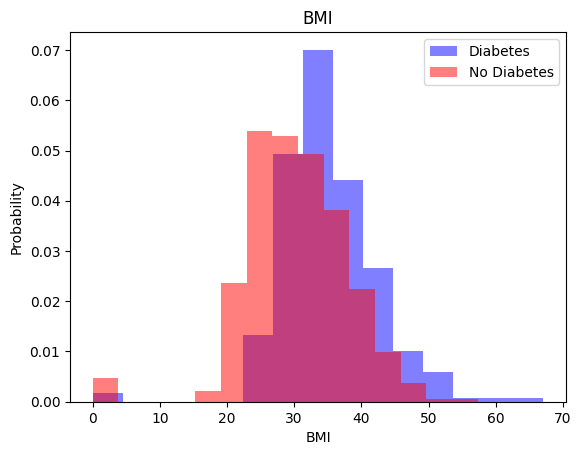

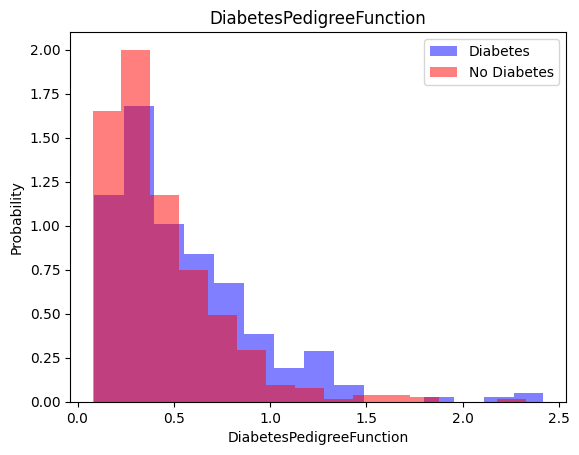

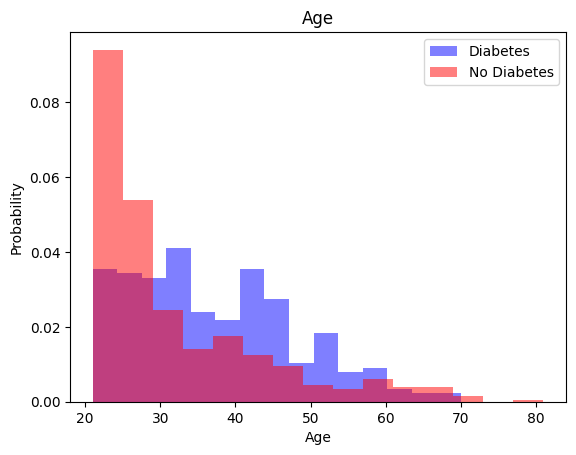

In [10]:
# checking for the relationships between the features and labels
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.5, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label='No Diabetes', alpha=0.5, density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [8]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

In [41]:
# defining features and labels
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [42]:
# scaling all the features 
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [43]:
# equalizing the classes
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [46]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [47]:
# splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

In [48]:
# building a simple neural net
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [51]:
# training the model
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=[X_val, y_val])

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.7485 - accuracy: 0.5217 - val_loss: 0.6712 - val_accuracy: 0.5800
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.6400 - val_loss: 0.6103 - val_accuracy: 0.6550
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6016 - accuracy: 0.6967 - val_loss: 0.5723 - val_accuracy: 0.6950
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5670 - accuracy: 0.7200 - val_loss: 0.5382 - val_accuracy: 0.7250
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.7383 - val_loss: 0.5168 - val_accuracy: 0.7650
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7650 - val_loss: 0.4997 - val_accuracy: 0.7600
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.7550 - val_loss: 0.4854 - val_accuracy: 0.7700
Epoch 8/20
38/38 [==

In [53]:
# eval on the validation set
model.evaluate(X_val, y_val)

7/7 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.7850


[0.482260137796402, 0.7850000262260437]

In [54]:
# eval on the test set
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 13ms/step - loss: 0.5545 - accuracy: 0.7500


[0.5545472502708435, 0.75]